# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
 > This problem is important to solve because market trends for cars in the indian market are changing. In particular, the demand for used cars appears to be increasing, and has outgrown the demand for new cars. The factors driving pricing in the used car market differ improtantly from the new car market. Therefore, it is important to better understand the factors driving used car sales as otherwise it is not possible for companies to effectively adapt to the occuring market shift.

### **The objective:**

 - What is the intended goal?
 > The intended goal is to develop a model that will allow to effectively predict used car prices. This will allow the budding tech startup Cars4U to use the market trend to their benefit, and effectively price their used cars.

### **The key questions:**

- What are the key questions that need to be answered?
> 1. What are the key factors that influence the prices of used cars in the indian market?
> 2. How can we use these improtant factors to effectively predict the prices of used cars?
> 3. How can this model be implemented to effectively improve the decision-making of buisness stakeholders, and ultimately the profitability of the business, by facilitating the appropriate pricing of used cars?

### **The problem formulation**:

- What is it that we are trying to solve using data science?
> We are trying to develop a predictive model using data science methods that will allow Cars4U to predict the prices of used cars in India. To build this model, several features such as the number of kilometers  driven, the fuel type, transmission, engine specifications, are some of the factors that will be used. Ultimately, this model aims to allow Cars4U to adapt to market trends and make informed decisions in the pricing of used cars. This will allow them to solve the difficulties associated with the pricing of used cars.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [371]:
# importing libraries for the manipulation of the data
import numpy as np
import pandas as pd

# importing libraries for data the visualisation of the data
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries for scaling / normalising the data using z-scores
from sklearn.preprocessing import StandardScaler

# importing libraries to conduct the shapiro-Wilk test
from scipy.stats import shapiro

# importing libraries for splitting thet dataset
from sklearn.model_selection import train_test_split

#Importing the library to compute the linear regression
import statsmodels.api as sm

#To check the assumption of multicollinearity by computing the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# importing libraries to build, tune, and evaluate the machine learning model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error #RMSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score #R-squared

#Importing the libraries for the cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Importing the libraries for checking the assumptions
from scipy import stats
import statsmodels.stats.diagnostic as diag

#For scatterplots of univariate analyses
from pandas.plotting import scatter_matrix

# Libraries for the ridge and hte lasso regressions
from sklearn.linear_model import Ridge, Lasso

#Library to determine teh best alpha value of the ridge regression model
from sklearn.model_selection import GridSearchCV

#For the decision tree
from sklearn.tree import DecisionTreeRegressor

#for the random forest model
from sklearn.ensemble import RandomForestRegressor


##For a neater presentation of the final submission, I am also setting my file such that warnings are ignored
import warnings
warnings.filterwarnings('ignore')

### **Let us load the data**

In [287]:
#Loading the dataset on my computer after having downloaded it from the Great Learning portal.
#Clicking the choose files option below and selecting the correct document to do so, document containing the data here is called "used_cars.csv"
from google.colab import files
uploaded = files.upload()

Saving used_cars_data.csv to used_cars_data (2).csv


## Data Overview

- Observations
- Sanity checks

In [288]:
# Reading the data
df = pd.read_csv('used_cars_data.csv')

# Using a fucntion that allows to determine the number of rows and columns for the dataset
num_rows, num_columns = df.shape

# Printing the results
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

# Using info() to print a concise summary of the DataFrame
df.info()

# In each column of the datafeame, checking the number of unique values
df.nunique()

Number of rows: 7253
Number of columns: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 383
Seats                   8
New_price             625
Price                1373
dtype: int64

In [289]:
#printing the 5 first columns to get an overview of the data
print(df.head())

   S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60   998.0   
1              41000    Diesel       Manual      First    19.67  1582.0   
2              46000    Petrol       Manual      First    18.20  1199.0   
3              87000    Diesel       Manual      First    20.77  1248.0   
4              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats  New_price  Price  
0   58.16    5.0        NaN   1.75  
1  126.20    5.0        NaN  12.50  
2   88.70    5.0       8.61   4.50  
3   88.76    7.0

In [290]:
#Computing the summary statistics of the dataset using the describe() function from pandas

summary_statistics = df.describe()

# Print the summary statistics
print(summary_statistics)

             S.No.         Year  Kilometers_Driven      Mileage       Engine  \
count  7253.000000  7253.000000       7.253000e+03  7251.000000  7207.000000   
mean   3626.000000  2013.365366       5.869906e+04    18.141580  1616.573470   
std    2093.905084     3.254421       8.442772e+04     4.562197   595.285137   
min       0.000000  1996.000000       1.710000e+02     0.000000    72.000000   
25%    1813.000000  2011.000000       3.400000e+04    15.170000  1198.000000   
50%    3626.000000  2014.000000       5.341600e+04    18.160000  1493.000000   
75%    5439.000000  2016.000000       7.300000e+04    21.100000  1968.000000   
max    7252.000000  2019.000000       6.500000e+06    33.540000  5998.000000   

             Power        Seats    New_price        Price  
count  7078.000000  7200.000000  1006.000000  6019.000000  
mean    112.765214     5.280417    22.779692     9.479468  
std      53.493553     0.809277    27.759344    11.187917  
min      34.200000     2.000000     3.9

####Interpretation:
- There are 7,253 rows in this dataset and 14 columns.
- This suggests that there are 7,253 used cars for which we have observations on 14 different types of features that ca be used to informe the model that we are developing.
> Sanity-check: this coincides with the information we were given on the assessment page of the great learning platform.
- There are 6 columns that have the datatype float64, meaning that they are numerical and have decimal values. This indicates that they are likely t have a continuous distribution.
> Sanity-check: This appears to be correct for all of them, except for the number of seats, where it does not neccessarily appear logiccal to have a decimal place, for example 7.2 seats does not make sense. However, at this point, there is no indication that this should itnerfere with our results later on, therefore, I decide to leave the datatype the way it is for now in this case.
- Three of the columns have the datatype int64, meaning that they contain integer data, i.e. discrete numerical values.
> Sanity-check: these columns are the serial number, manufacturing year, and number of kilometers driven, which is appropriate for the datatype for which they are registered. However, there appears to be an issue with the serial number, as this solely records the number of the observation and the serial number appears to be merged with the name of the car.
> **Action A**: Therefore, I will remove the serial number column, as it does no add any infrmation to our dataset, and develop a better way to format the name column.
- In this dataset, 5 columns contain information stored as object types. This includes labels for namese for example.
> Sanity-check: In this context, some of these will be an issue in future analyses, because for example the type of owner is recorded as 'first' and 'second' but this needs to become a dummy-coded / numeric variable as otherwise it will not be possible to include the infomration contained in this variable into the machine learning model that we are to build. **Action B**: transform the owner_type column such that it contains numberical values.

- By reviewing the data dictionary, I have noticed that there are differnet types of units in the mileage column KMPL or KM/PG. This may hinder comparability and interpretability of teh model, and might lead to errors later on, however, these would only be small errors, as it only applies if 1L of the fuel does not weigh 1kg, and the neccessary information to correct for this is not available. Therefore, this is something to keep in mind later on.


In [291]:
#Action A described above: (1) remove the serial number column and (2) develop a better way to format the name column.

##(1) remove the serial number column
df = df.drop(columns=['S.No.'])

##(2) develop a better way to format the name column
# have observed teh variable and decided to separate the infirmation into two columns. The first word in the name column appears to always be the brand of the car,
# followed by the rest, which includes a variable number of words indicating the type of the car. Therefore, I am creating two columns, separating them based on
#spacing, and creating one calles Brand, and the other called Car_Type, following the naming conventions that have been used to name the other variables.

df[['Brand', 'Car_Type']] = df['Name'].str.split(n=1, expand=True)

#Checking that this was implemented as intended
print(df.tail())

# This appears to have worked, wahich means that for concisedness of the data, I can now remove the Name column, as the information it contains is now in new columns.
df = df.drop(columns=['Name'])



                                                   Name   Location  Year  \
7248                  Volkswagen Vento Diesel Trendline  Hyderabad  2011   
7249                             Volkswagen Polo GT TSI     Mumbai  2015   
7250                             Nissan Micra Diesel XV    Kolkata  2012   
7251                             Volkswagen Polo GT TSI       Pune  2013   
7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...      Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
7248              89411    Diesel       Manual      First    20.54  1598.0   
7249              59000    Petrol    Automatic      First    17.21  1197.0   
7250              28000    Diesel       Manual      First    23.08  1461.0   
7251              52262    Petrol    Automatic      Third    17.20  1197.0   
7252              72443    Diesel    Automatic      First    10.00  2148.0   

      Power  Seats  New_price  Price          Brand  \
7248  103.6    5.0 

In [292]:
#Action B: transform the owner_type column such that it contains numberical values.

unique_owner_types = df['Owner_Type'].unique()

# Printing the unique types of entries in the column of interest
print("Unique Owner Types:", unique_owner_types)

#Replaing the names found in hte previous step with numerical equivalents.
##Need to keep in mind the detail here, that 4 will equal four and above and therefore not truly be equivalent to four, potentially biasing outputs.
##However, this does not appear to apply to many cars, and reflectst teh precision of the data collection mentods that were used, therefore the precision
## of this cannot be changed at this point.

owner_type_mapping = {
    'First': 1,
    'Second': 2,
    'Third': 3,
    'Fourth & Above': 4
}

# Using  the 'replace' method to transform the 'Owner_Type' column
df['Owner_Type'] = df['Owner_Type'].replace(owner_type_mapping)

#Uing describe function to check whether this was implemented as intended
print(df['Owner_Type'].describe())


Unique Owner Types: ['First' 'Second' 'Fourth & Above' 'Third']
count    7253.000000
mean        1.201572
std         0.456808
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: Owner_Type, dtype: float64


## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

####Q1 - What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables

In [293]:
#Summary statistics for the numerical variables

#Selecting all the columns that have numerical values
numerical_columns = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_price', 'Price']

#Using the describe function to obtain the descriptives of those values
numerical_summary = df[numerical_columns].describe()

# Printing the summary stats
print("Summary Statistics, Numerical Variables:\n", numerical_summary)


Summary Statistics, Numerical Variables:
               Year  Kilometers_Driven      Mileage       Engine        Power  \
count  7253.000000       7.253000e+03  7251.000000  7207.000000  7078.000000   
mean   2013.365366       5.869906e+04    18.141580  1616.573470   112.765214   
std       3.254421       8.442772e+04     4.562197   595.285137    53.493553   
min    1996.000000       1.710000e+02     0.000000    72.000000    34.200000   
25%    2011.000000       3.400000e+04    15.170000  1198.000000    75.000000   
50%    2014.000000       5.341600e+04    18.160000  1493.000000    94.000000   
75%    2016.000000       7.300000e+04    21.100000  1968.000000   138.100000   
max    2019.000000       6.500000e+06    33.540000  5998.000000   616.000000   

             Seats    New_price        Price  
count  7200.000000  1006.000000  6019.000000  
mean      5.280417    22.779692     9.479468  
std       0.809277    27.759344    11.187917  
min       2.000000     3.910000     0.440000  
25

In [294]:
#Summary statistics for the categorical variables

categorical_columns = ['Brand', 'Car_Type', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

#Counting the values in each categrory to get an initial understanding of the data distributions
categorical_summary = {}
for column in categorical_columns:
    categorical_summary[column] = df[column].value_counts()

#Printing the the summary statistics for the categorical variables in this datasert
for column, summary in categorical_summary.items():
    print(f"Summary Statistics for Categorical Variable '{column}':\n{summary}\n")


Summary Statistics for Categorical Variable 'Brand':
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: Brand, dtype: int64

Summary Statistics for Categorical Variable 'Car_Type':
XUV500 W8 2WD                     55
Swift VDI                         49
Swift Dzire VDI                   42
City 1.5 S MT              

####Interpretation (for both categorical and numerical data):
- The dataset spans a range of car manufacturing years, with the earliest car from 1996 and the most recent from 2019. This indicates that it includes both older and newer vehicles, providing a diverse set of data.
- The variable capturing the number of km has a range of values, with the minimum being as low as 172 kilometers and the maximum reaching a significant 6.5 million kilometers. This suggests a broad spectrum of usage distances for the cars in the dataset.
- In terms of mileage, the dataset shows variation, with the minimum mileage being 0 KMPL or KM/KG. This implies that some entries may have missing or incorrect mileage values, which should be  investigated further for data quality. Otherwise, it might be that the mileage of these cars has been reset, or thty have never been driven before, in which case it deos not make sense for them to be sold as used cars. Yet, from the data it is difficult to tell which one pof these options occured.
- The "Power" variable ranges from a minimum of 34.2 BHP to a maximum of 616 BHP, highlighing important differences in the  engine power of the different cars included in this dataset. Tihs diversity is further reflected in the magnitude of the types of car models.
- As rto seats, most cars in the dataset have five, but there are cars with seating capacities as low as two seats and as high as ten seats.
- The data include cars from a diverse set of brands, with Maruti, Hyundai, and Honda being the top three most represented brands.
- This variety is also reflected ib the type of cars present in the dataset.


####Q2 - Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights

In [295]:

#Creating a list that contains the differnt columns that have categorical data. I know which these columns are based on analyses I did in the data overview
#section above.
categorical_columns = ['Brand', 'Car_Type', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

for column in categorical_columns:
    unique_count = df[column].nunique()
    print(f"{column} - N of unique observations: {unique_count}")


Brand - N of unique observations: 33
Car_Type - N of unique observations: 2041
Location - N of unique observations: 11
Fuel_Type - N of unique observations: 5
Transmission - N of unique observations: 2
Owner_Type - N of unique observations: 4


####Interpretation:
- There are many different car types, but these all stem from 33 brands. This suggests that teh car type fucntion will not be particularlyl useful in contributing to the predictive validity of the model, but the brand name might.
- The number of unique values for the location, fuel type and transmission are not surprising upon interpretation and appear realisitc.
- A note should be made regarding the owner type however, because it indicates that some cars have had up to four owners already. It would be interesting to investigate the relationship between this variable and age, which I will do later on.

####Q3 - Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [296]:
#I will now furhter check the data distributions, and see whether I can setect any anomalies in my dataset.
#To this end, I will create a table that displays the top five highest, and another table that displays the top 5 lowest values in all of the continuous variables.
# This will allow me to get an initial understanding of whether there are any outliers present in those columns.


# Sorting and selecting the five highest values for each of the continuous variables in my dataset
top_5_highest_values = df.select_dtypes(include=['int64', 'float64']).apply(lambda x: x.sort_values(ascending=False).head(5))

# The initial table was not very legible, therefore I found a function that can reset the index, and I am replacing the NaN's with a -.
top_5_highest_values = top_5_highest_values.reset_index()
top_5_highest_values = top_5_highest_values.fillna('-')

# Printing the table
print(top_5_highest_values)


    index    Year Kilometers_Driven Owner_Type Mileage  Engine  Power Seats  \
0      29       -                 -        4.0       -       -      -     -   
1     152       -                 -          -       -  5461.0      -     -   
2     340       -          775000.0          -       -       -      -     -   
3     358       -          620000.0          -       -       -      -     -   
4     814       -                 -          -       -       -      -  10.0   
5    1081       -                 -        4.0       -       -      -     -   
6    1332       -                 -          -   33.54       -      -     -   
7    1505       -                 -          -       -       -      -     -   
8    1860       -          720000.0          -       -       -      -     -   
9    1907       -                 -          -       -       -      -  10.0   
10   1974       -                 -          -       -       -      -     -   
11   2059       -                 -          -   33.

####Interpretation (for the highest values of continuous columns):
- S.No. = the setrial number is is not relevant for interpretation in this case.
- Year = 2019 is the year where data collection was stopped, therefore it makes sense that the five highest values are this number.  
- Kilometers_Driven = there appears to be an improtant outlier here, given that four of the highest five values have six figures, and one value has seven figues, suggesting that the car in question has been driven for 6.5 million killometers, which is unrealistic in this context.
> Action A: this suggests that the value with the index 2328, where the car has been driven for 6.5 million kilometers is an outlier, and I will therefore remove this row from the dataset. It may be that the person colelcting the data made a typing error and included one zero too many. However, we do not have the possibility to verify whether this truly is hwat happened, and therefore, it is best to be cautious and remove this row completely from future analyses.
- Mileage = there appears to be a ceiling reached at 33.54 miles, which is plausible and there appears to be no further anomaly.
- Engine = the top five values of the displacement volume of the engine in CC are all in the same order of magnitude. Therefore, they do not raise suspicion towards any anomaly.
- Power = here, the same observation as for the engine variable applies.
- Seats = the top 5 values are 10, suggesting that there are some cars with 10 seats, which is high, but possible for family cars or larger multi-purpose vehicles.
- New_price = there is the value of 375 for the car with teh index 6354 that initially apears higher than the other cars. However, this is also a car that has one of the five highest values for both engine and power, which makes its higher price compared to the other cars plausible.
- Price = there also do not appear to be any unrealistic values or outliers in this variable.

In [297]:
#Action A: Implementing the action described in the interpretation above, where I remove the car that has supposedly been driven for 6.5 million kilometers.
# To check after teh removal whether this was implemented as intended, I am priting the shape of teh dataframe before teh removal of this datapoint.
print("Before removal:", df.shape)

# Removing the aforedescribed row
df = df[df['Kilometers_Driven'] != 6500000.0]

# Printing the shape of the df after the removal of the outlier
print("After removal:", df.shape)

outlier_presence_check_Kilometers_Driven = (df['Kilometers_Driven'] == 6500000.0).any()

print(outlier_presence_check_Kilometers_Driven)

Before removal: (7253, 14)
After removal: (7252, 14)
False


####Interpretation:
- After implementing the removal of the outlier, the number of rows has decreased by one and there is no more value of 6.5 million in the kilometers driven column.
- This suggests that the removal was implemented as intended.

In [298]:
#Computing the same table, but for the lowest values present in each of the columns
# Sorting and selecting the five highest values for each of the continuous variables in my dataset
top_5_lowest_values = df.select_dtypes(include=['int64', 'float64']).apply(lambda x: x.sort_values(ascending=True).head(5))

# The initial table was not very legible, therefore I found a function that can reset the index, and I am replacing the NaN's with a -.
top_5_lowest_values = top_5_lowest_values.reset_index()
top_5_lowest_values = top_5_lowest_values.fillna('-')

# Printing the table
print(top_5_lowest_values)

    index    Year Kilometers_Driven Owner_Type Mileage Engine Power Seats  \
0       0       -                 -        1.0       -      -     -     -   
1     124       -                 -          -       -  624.0     -     -   
2     134       -                 -          -       -      -     -   2.0   
3     424       -                 -          -     0.0      -     -     -   
4     693       -                 -          -       -      -     -   2.0   
5     798       -                 -          -       -      -     -   2.0   
6     915       -                 -          -       -      -     -   2.0   
7    1008       -                 -          -       -      -  34.2     -   
8    1198       -            1000.0          -       -      -     -     -   
9    1361       -             171.0          -       -      -     -     -   
10   1628       -                 -          -       -      -     -     -   
11   1713       -                 -          -       -      -     -     -   

####Interpretation (for the lowest values of continuous columns):
- S.No. = not relevant for interpretation here.
- Year = 1998 is the year where data collection was stopped, therefore it makes sense that the five highest values are this number.  
- Kilometers_Driven = no apparent anomalies.
- Mileage = it does not make sense that the standard mileage offered by the car company in KMPL or KM/KG is zero.
> Action A: Find out how many values have zeroes for this column.
> Action B: If this number is not above 2% of the total number of rows in this dataset, remove the rows that have zeroes for this attribute. I have chosen 1% as I do not want it to remove too much power from my analyses. Otherwise, see which variable x is most highly correlated with mileage, and replace the zeroes with the mean mileage that other cars the same magnitude of x have.   
- Engine = the top five values of the displacement volume of the engine in CC are all in the same order of magnitude. Therefore, they do not raise suspicion towards any anomaly.
- Power = here, the same observation as for the engine variable applies.
- Seats = the top 5 values are 10, suggesting that there are some cars with 10 seats, which is high, but possible for family cars or larger multi-purpose vehicles.
- New_price = there is the value of 375 for the car with teh index 6354 that initially apears higher than the other cars. However, this is also a car that has one of the five highest values for both engine and power, which makes its higher price compared to the other cars plausible.
- Price = there also do not appear to be any unrealistic values or outliers in this variable.

In [299]:
##Action A: Finding out how many values have zeroes for the mileage column
zero_mileage_count = (df['Mileage'] == 0).sum()

print(f"Number of values with value zero in the mileage column: {zero_mileage_count}")

#Calculating how many percent of the total dataset this is. If it is below 2%, then I will remove those values as I jusdge that in this case it would
#not significantly impact the power of my final analyses.
total_count = 7252 #I know this from the investigations of the number of variables after the outlier in the number ofo kilometers driven was removed.

percentage_zero_mileage = (zero_mileage_count / total_count) * 100

print(f"The percentage of zero mileage compared to {total_count} is: {percentage_zero_mileage:.2f}%")

Number of values with value zero in the mileage column: 81
The percentage of zero mileage compared to 7252 is: 1.12%


####Interpretation:
- The percentage is below 2%, which means that based on how I described that the values would be treated above, I will remove the 81 rows which have a value of 0 for the mileage column.

In [300]:
##Action B: As justified above, removing the rows with a value of 0 in the Mileage column
# To check after teh removal whether this was implemented as intended, I am priting the shape of the dataframe before removing the described values.
print("Before removal:", df.shape)

#Removing the rows with the value of 0 for this column
df = df[df['Mileage'] != 0]

# Resetting the index to avoid issues later on in the analyses.
df = df.reset_index(drop=True)

# Printing the shape of the df after the removal of the outliers
print("After removal:", df.shape)

outlier_presence_check_Mileage = (df['Mileage'] == 0).any()

print(outlier_presence_check_Mileage)

Before removal: (7252, 14)
After removal: (7171, 14)
False


####Interpretation:
- After implementing the removal of the outliers, the number of rows has decreased by 81.
- This suggests that the removal was implemented as intended.
- In addition, there are no further values with zeroes present in this column.

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perform the log_transformation(if needed) and write down your observations?

###Q1. Do univariate analysis for numerical and categorical variables? &
###2. Check the distribution of the different variables? is the distributions skewed?

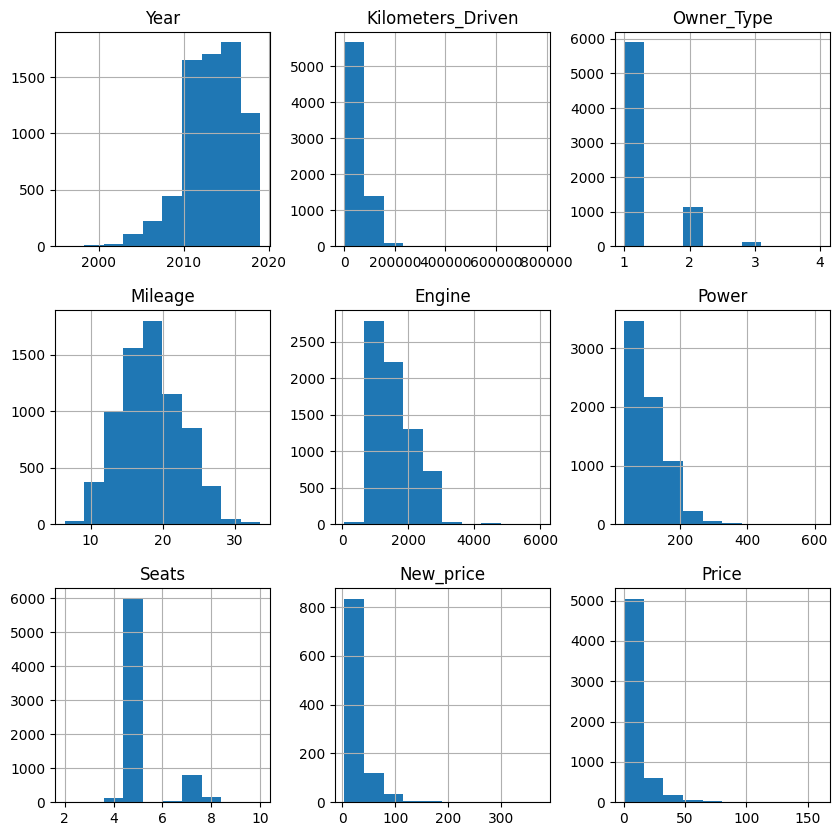

In [301]:
#Creating a list with the columns that contain continuous variables such that I can visualise them using histograms and boxplots
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Creating a jistogram for each of those variables
df[continuous_columns].hist(figsize=(10, 10))

# Printing them in a grid
plt.show()

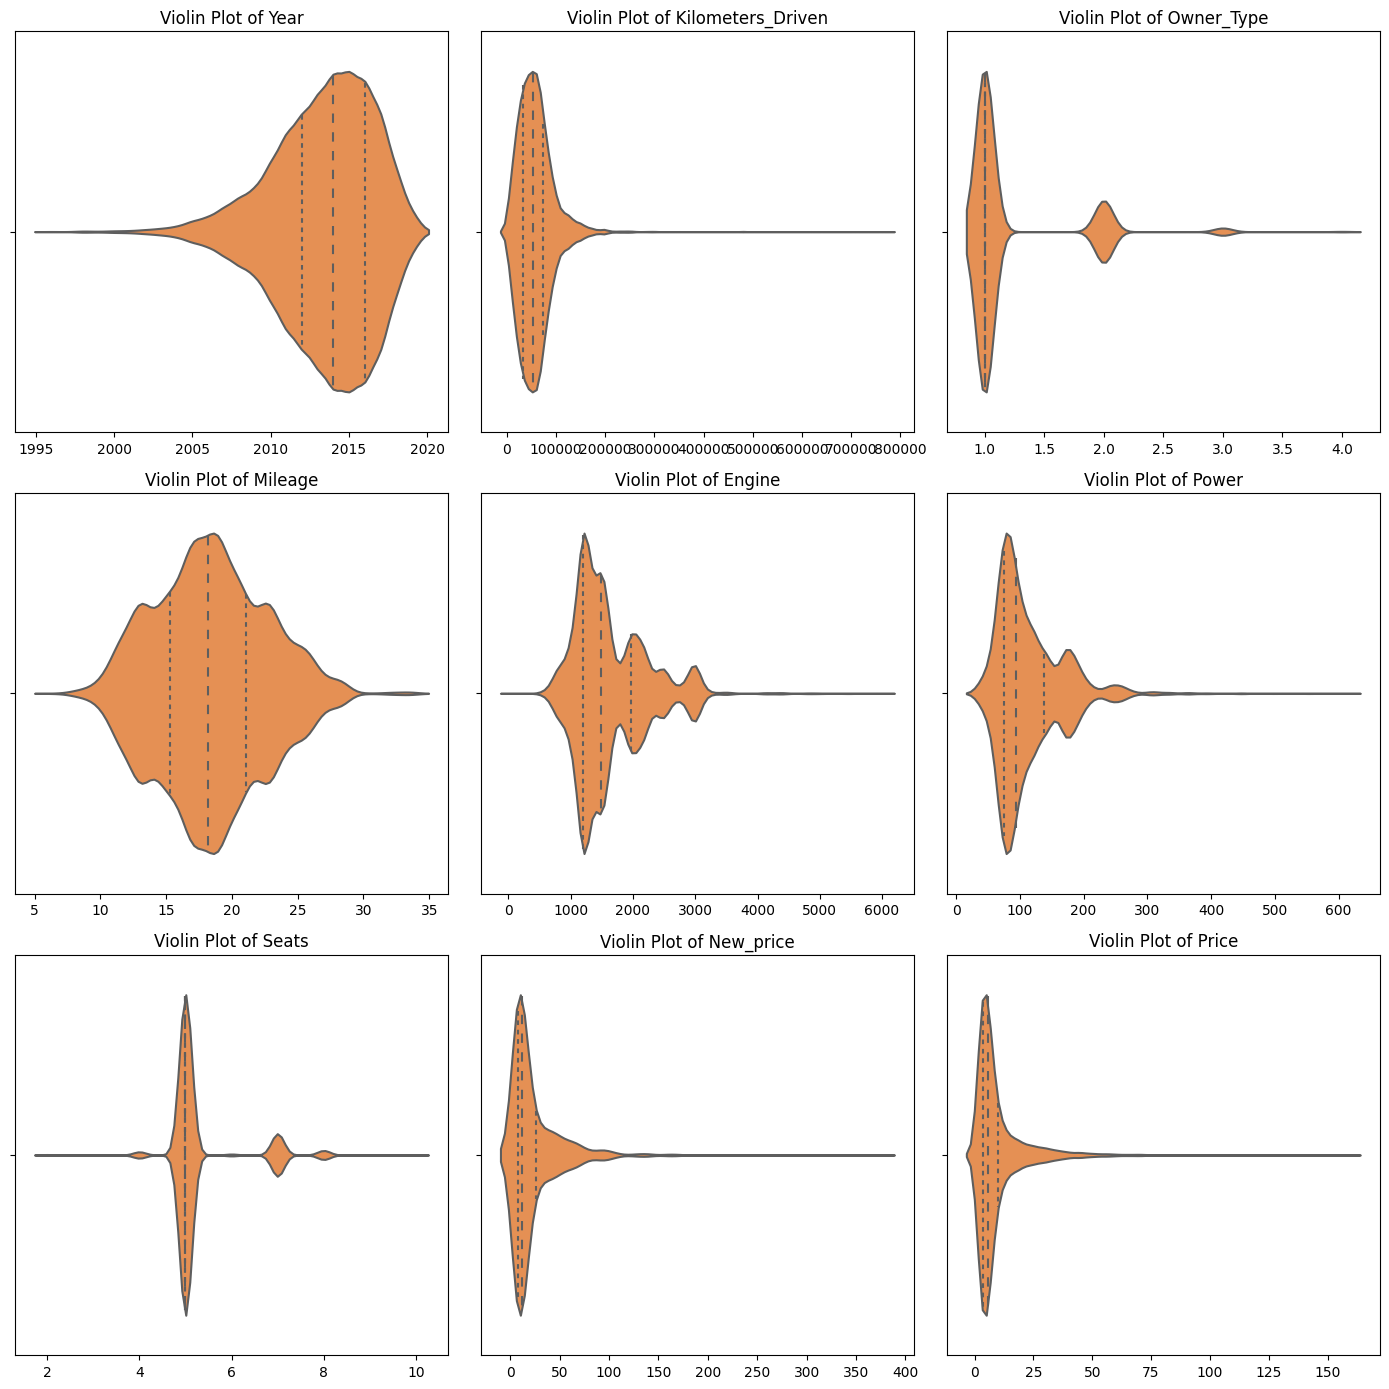

In [302]:
#Visualising the same continuous variablel in another way to get a more comprehensive understanding of the data distributions.
#Accordingly, computing violin plots

plt.figure(figsize=(14, 14))
for i, var in enumerate(continuous_columns):
    plt.subplot(3, 3, i + 1)  # Create a subplot for each variable
    sns.violinplot(data=df, x=var, inner="quart", palette="Oranges")
    plt.title(f'Violin Plot of {var}')
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

# Printing the violin plots in a grid
plt.show()

###3. Do we need to do log_transformation, if so for what variables we need to do?

####Interpretation:
- Based on the violin plots computed above, I can see that there are three variables which need to be log-tranformed.
> These are: Kilometers driven, price and new price because they are heavily right skewed.

###Q4. Perform the log_transformation(if needed) and write down your observations?

In [303]:
#Computing the log transformations for the variables I identified above
# I am shifting teh scale by one to avoid there being any zero values, whcih cannot be log-transformed. If I did not do this, I might end up with many
# N/A values, which would be a problem later on when I build my predictive model.

columns_to_log_transform = ['Price', 'New_price', 'Kilometers_Driven']

for column in columns_to_log_transform:
    df[column] = np.log(df[column] + 1)

  #These need to be log transformed as otherwise they are going to violate teh assumption of normality in the regression model that is to be built.


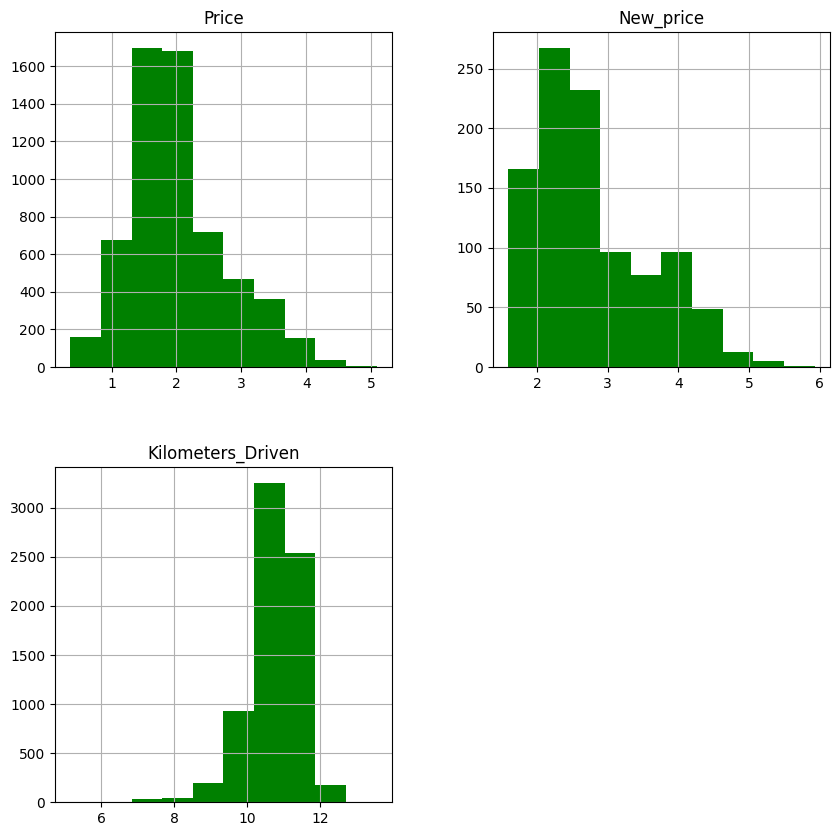

In [266]:
#Checking the distribution of the variables after the log transformation has been applied
# Creating a jistogram for each of those variables
df[columns_to_log_transform].hist(figsize=(10, 10), color='green')

# Printing them in a grid
plt.show()

#This shows that the logarithmic transofmrations have had the desired effect, as the data distribution is now less skewed.

####Interpretation:
- After computing the logarithmic transformations, it can be observed that the shape of the datadistributino has been normalised.
- This suggests that the variables are no longer violating the assumtpions and can be used in furhter anayses.

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

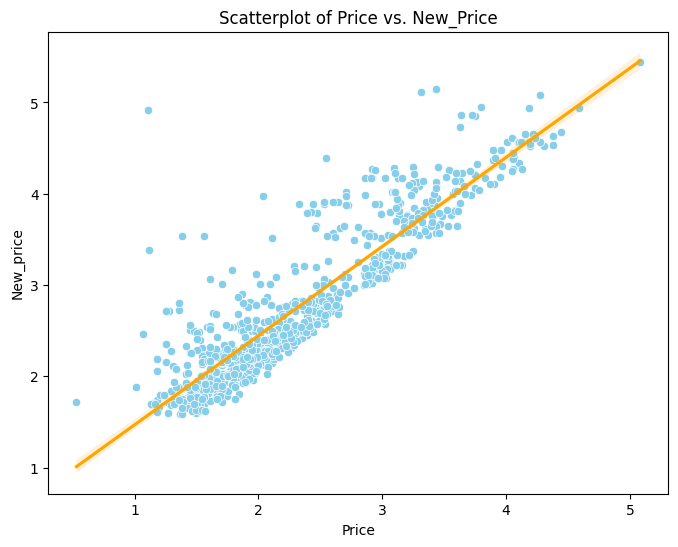

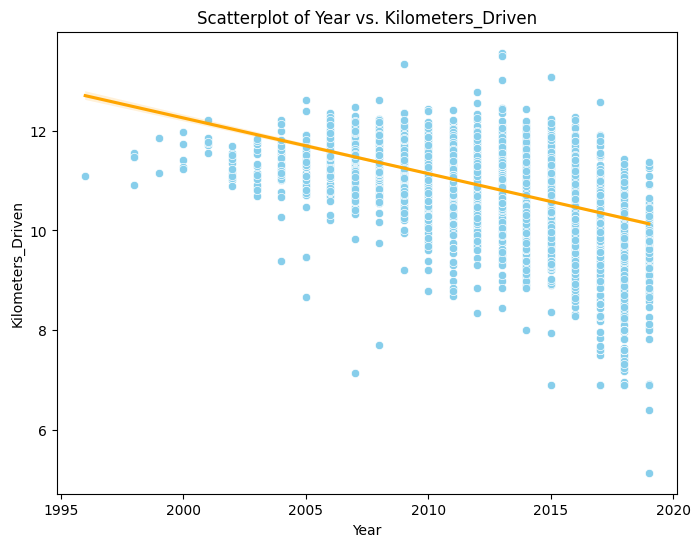

In [304]:
#Q1 - Scattterplots for the log-transformed values:

#Creating hte scatterplots, after creating a list with the data dimensions I would like to have and the associated titles to facilitate understanding.
scatterplot_data = [
    {'x': 'Price', 'y': 'New_price', 'title': 'Scatterplot of Price vs. New_Price'},
    {'x': 'Year', 'y': 'Kilometers_Driven', 'title': 'Scatterplot of Year vs. Kilometers_Driven'},
]

for data in scatterplot_data:
    plt.figure(figsize=(8, 6))
    x = df[data['x']]
    y = df[data['y']]

    sns.scatterplot(x=x, y=y, color='skyblue')
    sns.regplot(x=x, y=y, color='orange', scatter=False, label='Line of Best Fit')

    plt.xlabel(data['x'])
    plt.ylabel(data['y'])
    plt.title(data['title'])

    plt.show()


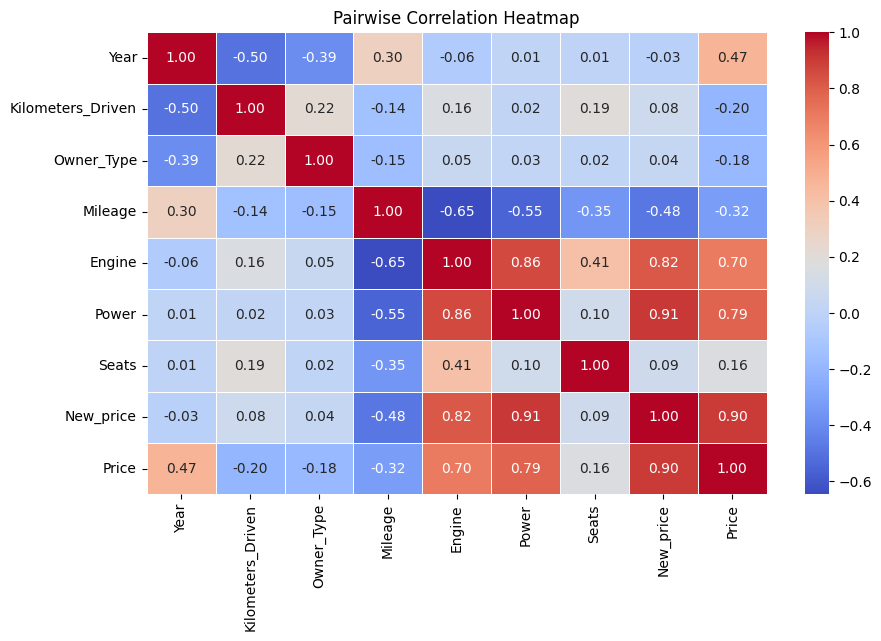

In [305]:
##Computing a heatmap to get an overview of the associations between the different variables

# Computing a correlation matrix for all variables present in my dataframe
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()

# Creating a heatmap to visualise this correlation matrix
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Pairwise Correlation Heatmap')
plt.show()



####Interpretation:
- Based on a visual assessment of the above correlation matrix, I will further analyse the magnitude of the associations of the variables that have correlations above the magnitude of .70 as this is the threshold used to determine strong-to-very-strong correlations.
- I will seek to better understand the correlations between those variables through visualisations

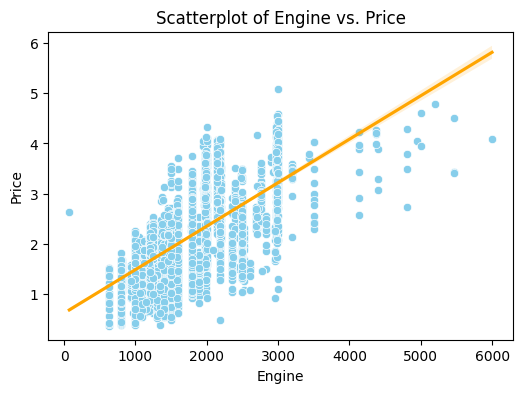

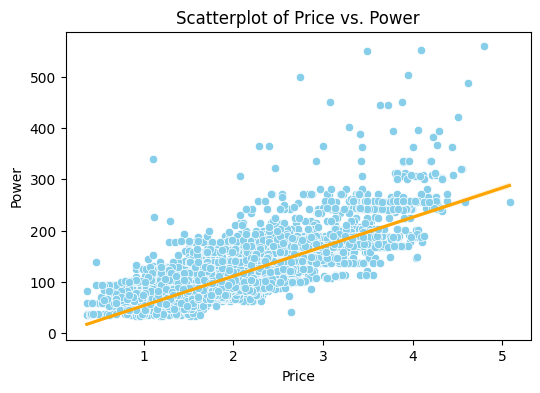

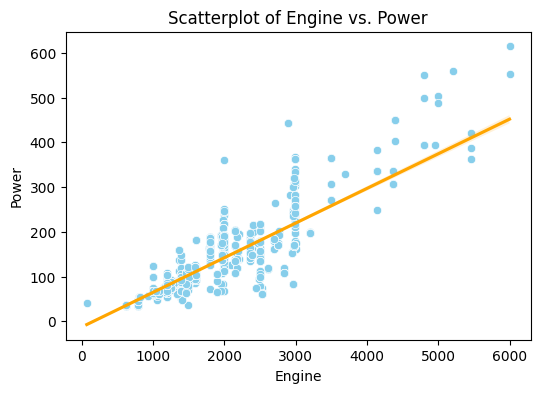

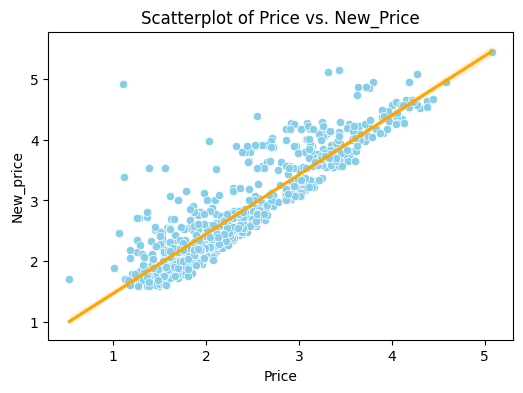

In [306]:
#Computing scatterplots to visualise the associaiton between those variables that had a correlation above the threshold of .7
scatterplot_data = [
    {'x': 'Engine', 'y': 'Price', 'title': 'Scatterplot of Engine vs. Price'},
    {'x': 'Price', 'y': 'Power', 'title': 'Scatterplot of Price vs. Power'},
    {'x': 'Engine', 'y': 'Power', 'title': 'Scatterplot of Engine vs. Power'},
    {'x': 'Price', 'y': 'New_price', 'title': 'Scatterplot of Price vs. New_Price'},
]

#Computing hte scatterplots for each pair
for data in scatterplot_data:
    plt.figure(figsize=(6, 4))
    x = df[data['x']]
    y = df[data['y']]

    sns.scatterplot(x=x, y=y, color='skyblue')
    sns.regplot(x=x, y=y, color='orange', scatter=False, label='Line of Best Fit')

    plt.xlabel(data['x'])
    plt.ylabel(data['y'])
    plt.title(data['title'])

    plt.show()

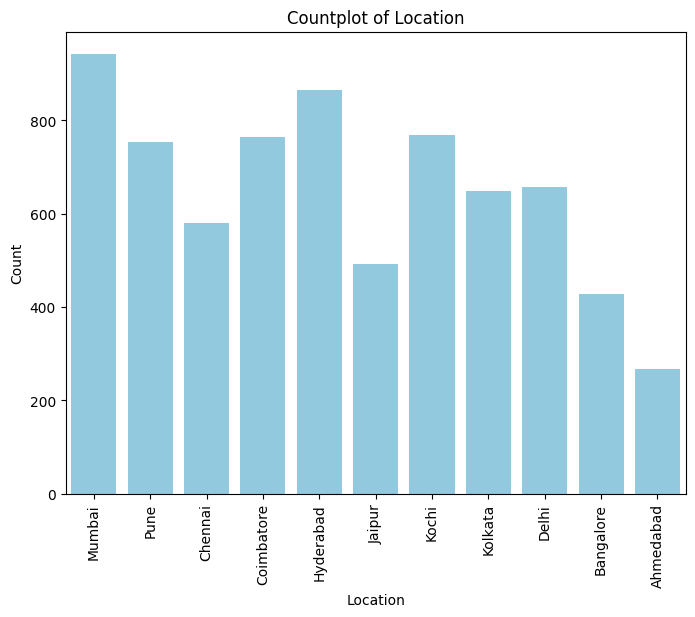

In [307]:
#Creating a histogram to remind myself of the data distribution of the location variabel
#I added a rotation of the labels on the x-axis as otherwise the readability was poor
plt.figure(figsize=(8, 6))
sns.countplot(x='Location', data=df, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Countplot of Location')

plt.show()

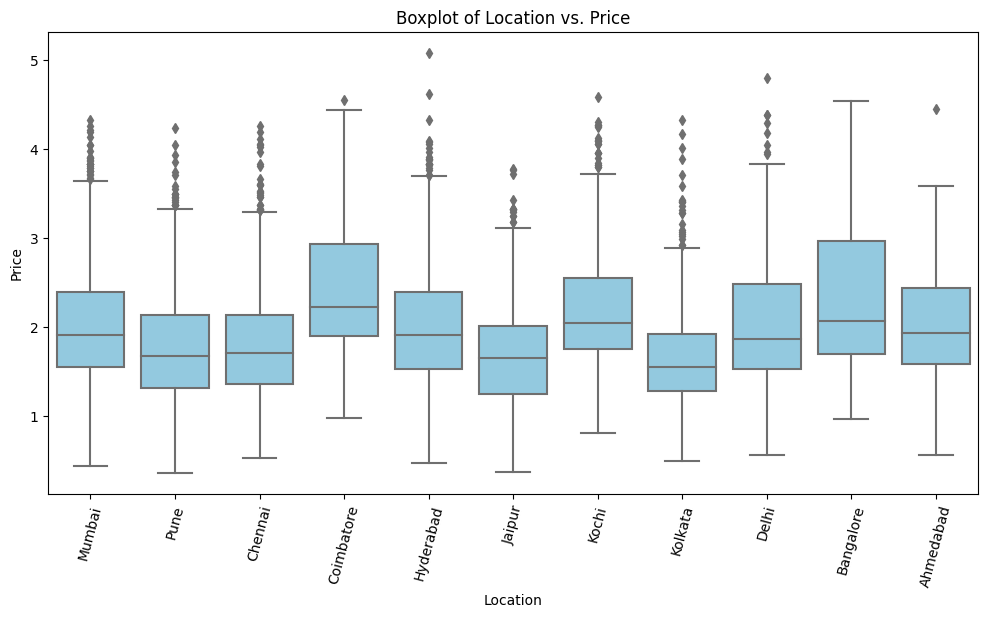

In [308]:
#Computing a boxplot to investigate the association between location and price
#I added a rotation of the labels on the x-axis as otherwise the readability was poor
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Price', data=df, color='skyblue')
plt.xticks(rotation=75)
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Boxplot of Location vs. Price')

plt.show()

####Interpretation:
- The investigation of the distribution of the location variable, and in particular its association with Price suggests that while there are differences in the price of the cars depending on their locations, these do not differ significantly.
- I am reaching this conclusion because the error bars for all of these overlap.
- This suggests that Location is unlikely to be a good predictor variable for the model predicting prices that we are building.

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [169]:
##This has already been transformed in Action B of the data overview section above, where I created two columns based on the single column, and dropped
## the initial column, such that I now have one column indicating the brand, and the other the model type in my model.

### **Missing value treatment**

In [309]:
#Determining where there are missing values

null_values_initial = df.isnull().sum()

print(null_values_initial)

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 34
Power                 130
Seats                  39
New_price            6169
Price                1221
Brand                   0
Car_Type                0
dtype: int64


####Interpretation:
- There are a few columns with missing values, which I will decide to treat differently based on their nature and importance to the model.
> The general rule that I am adhering to here is that I am using median imputation when dealing with continuous variables. This allows to avoid my imputations from being biased by outliers and skewed data distributions. For categorical variables, I am imputing using the mode.
1. Action A: I will remove the rows where there are missing values for both the price and new_price columns as is both are missing that is not adequate for the predictive model that we are building.
2. Action B: As there are only two missing values, I will replace the missing values in the mileage column by its median
3. Action C: I will replace by the median value for missing values in the engine column
4. Action D: As there are many missing values in the power column, I am also replacing it by the median alues in this column
5. Action E: I will replace by the mode value for missing values in the seats column



In [310]:
#Action A
#Removing the rows where both the new price and the current price are missing, as these are key variables to the model that I am building
df = df.dropna(subset=['New_price', 'Price'], how='all')

#Initially, I planned on creating another regression model that seeks to predict the price of the cars when it is new. However, I have decided not to do so,
#because it would just end up using the same information twice in the final model that I am seeking to build. Therefore, this would have the potential to
#magnify individual differences between data entries.

#Action A followed, therefore, I am also replacing with median values the missing values in hte price and New_price columns
median_Price = df['Price'].median()
df['Price'].fillna(median_Price, inplace=True)

median_New_price = df['New_price'].median()
df['New_price'].fillna(median_New_price, inplace=True)


#Action B
#Replacing missing values for the mileage column
median_mileage = df['Mileage'].median()
df['Mileage'].fillna(median_mileage, inplace=True)


#Action C
#Replacing missing values for the engine column
median_engine = df['Engine'].median()
df['Engine'].fillna(median_engine, inplace=True)


#Action D
#As there are many missing values in the power column, I am replacing it with median values in this column
median_power = df['Power'].median()
df['Power'].fillna(median_power, inplace=True)

#Action E
#Replacing missing values for the seats column with the mode
mode_seats = df['Seats'].mode()[0]
df['Seats'].fillna(mode_seats, inplace=True)


#Checking what the missing values look like after implementing the above changes

null_values = df.isnull().sum()

print(null_values)

#The data below shows that there are no more missing values left in my dataset which means that it is ready for me to use for developping my model.

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_price            0
Price                0
Brand                0
Car_Type             0
dtype: int64


## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?
- There was a value for the number of kilometers driven that was equal to 6.5 million kilometers, which was removed during the data preprocessing.
- There were 81 values in the Mileage column that were recorded as zero, which does not make sense, and appears to indicate another anomaly in the data collection. Therefore, the rows containing those values were also removed from further analyses.
- Median imputation was used when dealing with continuous variables. This allows to avoid my imputations from being biased by outliers and skewed data distributions. For categorical variables, I imputed using the mode.
- Other feature engineering steps were taken, such as dividing the information in the name column into Brand and Car_Type.
- There were quite a lot of missing values for the New_price collection in particular, while these have been mean imputed, it is important to be cautious in the interpretation of this variable.
- Some columns that have been visualised in scatterplots appear to have particularly high corelations, these include Engine & Price, as well as Price & Power, suggesting that these will be valuable variables in exlaining the variability of the DV in the regression model that we are to build.

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
> My column will be called Price here, because I have replaced the log transformed values with thet non-transformed values in this dataset, instead of creating a new column.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name.
> (A) Before computing any of the steps below, I will check the assumptions of my variables.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.



### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:**

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

####Answer:
- I dropped car_type, because it is the variable that contained the individual car models, of which there was too much variability for it to be useful in the prediciton of my outcomes. However, I kept 'Brand' which resulted from my feature engineering as this was likely to be useful in the prediction of the treatment outcomes.
- I did not have price log, as I replaced the values in the Price column - thereby dropping it automtically as I am dropping price. Price needs to be dropped from the x  column as it is our dependent variable and therefore we cannot use it as part of the independent vairables in hte prediction of the model.
- I am also removing the kilometers driven column because it was importantly skewed and as shown by the data visualiations this was not significantly corrected through the logarithmic transformaiton, suggesting that it still violates the important asumption of linarity and can therefore not be used in any analyses involving regression techniques.
- I am removing the Car_Type variable, because it contains too many different categories and would likely lead to overfitting if it were incldued. And it would create too many additional columns.

####Step 1: Seperating the indepdent variables (X) and the dependent variable (y).

In [318]:
#Computing Step 1
X = df.drop(columns=[ 'Price', 'Kilometers_Driven', 'Car_Type'])
y = df["Price"]

####Step 2: Encode the categorical variables in X using pd.dummies.

In [320]:
#Computing Step 2
#Using the drop first  = true argument because it ensures that there will be no issues with multicollinearity in the future models that are to be built
X = pd.get_dummies(X, drop_first = True)


####Step3: Split the data into train and test using train_test_split.

In [323]:
#Computing Step 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

# Adding an intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

###**Building Models**
- Building various models and tuning the model to get better validation
1. What different techniques should be explored?

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

2. How these techniques can be improved?
- This will be determined on a case-by-case basis depending on the type of model that is being build and the initial results. However, this will include appraoches such as k-fold cross-validation, feature engineering and hyperparameter tuning.

3. Why the techniques suggested are the best to explore for the data and problem at hand?
- Linear regressions are a good starting point to develop an initial model and gain an understanding of the predictive variables that may be used
- The regularised regression models are likely to be useful because they allow to account for overfitting. Overfitting my be an issue in the linear regression model given that there are many features used to predict the price of used cars. In particular, ridge regressino models help prevent multicollinearity through coefficients. Lasso regression helps to select only the most relevant features, makign the model more generalisable.
- Decision trees will be useful because they can be used even if teh relationship between the variables is non-linear. This is particularly useful, given that we have both categorical and continuous variables, and it is difficult to check assumptions such as the assumption of linearity between these different data types. This is visualisable and intuitive to interpret.
- Random forests may have a better predictive performance compared to decision trees because it is an ensemble learning method. These are not as visualisable and interpretability is reduced. In addition, it is likely to be better at handling the high dimensionality that ensued from dummy coding the categorical variables that we had.
> Each of these different approaches has their respective limitations. By investigating all of them, it will allow to determine the model that suits the objectives of this investigation best and allows to maximise interpretability, reliability and validity.

### **1) Linear Regression Model**

In [334]:
#Fitting a linear regression model
linear_model = sm.OLS(y_train, X_train).fit()

# Printing the summary statistics
print(model.summary())


##I am aware that the r-squared value is in the printed model summary, however, I am still calculating it again to make it easier for me to compare the
##results from the different models later on

#Computing R squared - train set
y_train_pred = linear_model.predict(X_train)
r_squared_train = r2_score(y_train, y_train_pred)
print(f'R-squared (Train): {r_squared_train:.2f}')

# Computing R squared - test set
y_test_pred = linear_model.predict(X_test)
r_squared_test = r2_score(y_test, y_test_pred)
print(f'R-squared (Test): {r_squared_test:.2f}')

##Note for interpretation of this value, lower RMSE suggests that the model has a better predictive accuracy
# Computing RMSE - train set
y_train_pred = linear_model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f'RMSE (Train): {rmse_train:.2f}')

# Computing RMSE - test set
y_test_pred = linear_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'RMSE (Test): {rmse_test:.2f}')


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     715.8
Date:                Wed, 18 Oct 2023   Prob (F-statistic):               0.00
Time:                        16:16:10   Log-Likelihood:                 117.06
No. Observations:                4292   AIC:                            -130.1
Df Residuals:                    4240   BIC:                             200.8
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -202.0612    

In [341]:
# Building a new linear regression model that only contains the columns that were found to be significant in the previous linear regression model
significant_variables = ['Year', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_price', 'Location_Bangalore', 'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Brand_Bentley', 'Brand_Land', 'Brand_Mini', 'Brand_Tata']

X_significant = X_train[significant_variables]
X_test_significant = X_test[significant_variables]  # Select the same significant columns for X_test

# Adding a constant - making sure that this is added both to the test and the train dataset
X_significant = sm.add_constant(X_significant)
X_test_significant = sm.add_constant(X_test_significant)

# Fitting this second linear regressino model
linear_model_significant = sm.OLS(y_train, X_significant).fit()

# Printing summary output
print(linear_model_significant.summary())

# Computing R squared - train set
y_train_pred = linear_model_significant.predict(X_significant)
r_squared_train = r2_score(y_train, y_train_pred)
print(f'R-squared (Train): {r_squared_train:.2f}')

# Computing R squared - test set
y_test_pred = linear_model_significant.predict(X_test_significant)
r_squared_test = r2_score(y_test, y_test_pred)
print(f'R-squared (Test): {r_squared_test:.2f}')

# Computing RMSE - train set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f'RMSE (Train): {rmse_train:.2f}')

# Computing RMSE - test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'RMSE (Test): {rmse_test:.2f}')


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1609.
Date:                Wed, 18 Oct 2023   Prob (F-statistic):               0.00
Time:                        16:33:48   Log-Likelihood:                -800.05
No. Observations:                4292   AIC:                             1630.
Df Residuals:                    4277   BIC:                             1726.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -205.1748      3

####Interpretation:
 - Overfitting may be raised as a concern for the first linear regression model.
 - However, there is no important difference in magnitude between the r-squared and RMSE values between teh training and testing dataset, suggesting that overfitting is not happening.
 - Therefore, to further investigate its generalisability, I computed k-fold cross validation on the first linear regression model.
 > Please see the section on "Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)" below for the interpretation of the different model fits and their comparison with other models.
 > Importantly, the above findings also suggest that the five most important factors to consider are (in descending order): year, power, mileage, engine, and type of transmission.

###**Hyperparamter Tuning: Linear regression models**

In [343]:
# Define the estimator (linear regression)
estimator = LinearRegression()

# Compute the cross-validation with 5 folds
scores = cross_val_score(estimator, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Printing the results for analysis
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [-0.05559933 -0.07900034 -0.0522818  -0.05794092 -0.05979078]
Mean Score: -0.06092263471711279
Standard Deviation: 0.00938058338650951


####Interpretation:
- The low standard deviation (0.01) observed across the folds suggests that there is little variation between the models, suggesting consistency in its predictive validity.
- The low mean MSE value also indicates a relatively high predictive accuracy  of the model.
> Overall, this suggests that the model is still performing as well after cross validation, which further confirms its good predictive validity.

### **2) Ridge/Lasso Regression**



In [352]:
##Personal Reminder
#ridge regressino models help prevent multicollinearity through coefficients.
#Lasso regression helps to select only the most relevant features, makign the model more generalisable.


##Computing the Ridge regression model
ridge = Ridge(alpha=0.01)
#Will compute hyperparameter tuning later on to determine the best value of alpha

#Fitting the model and using it to make predictions on both training and testing dataset
ridge.fit(X_train, y_train)

y_pred_ridge_train = ridge.predict(X_train)
y_pred_ridge_test = ridge.predict(X_test)

## Computing the Lasso regression model
lasso = Lasso(alpha=0.01)
#Will compute hyperparameter tuning later on to determine the best value of alpha

#Fitting the model and using it to make predictions on both training and testing dataset
lasso.fit(X_train, y_train)

y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(X_test)


# Computing R-squared and RMSE for Lasso on training and testing data respectively
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)

rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))

# Computing R-squared and RMSE for the ridge regression on training and testing data respectively
rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))

r2_ridge_train = r2_score(y_train, y_pred_ridge_train)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Printing results
print(f"Ridge Regression, train data - r-squared: {r2_ridge_train:.2f}")
print(f"Ridge Regression, test data - r-squared: {r2_ridge_test:.2f}")
print(f"Ridge Regression, train data - RMSE: {rmse_ridge_train:.2f}")
print(f"Ridge Regression, test data - RMSE: {rmse_ridge_test:.2f}")

print(f"Lasso Regression, train data - r-squared: {r2_lasso_train:.2f}")
print(f"Lasso Regression, test data - r-squared: {r2_lasso_test:.2f}")
print(f"Lasso Regression, train data - RMSE: {rmse_lasso_train:.2f}")
print(f"Lasso Regression, test data - RMSE: {rmse_lasso_test:.2f}")


Ridge Regression, train data - r-squared: 0.90
Ridge Regression, test data - r-squared: 0.90
Ridge Regression, train data - RMSE: 0.24
Ridge Regression, test data - RMSE: 0.23
Lasso Regression, train data - r-squared: 0.84
Lasso Regression, test data - r-squared: 0.84
Lasso Regression, train data - RMSE: 0.29
Lasso Regression, test data - RMSE: 0.29


###**Hyperparamter Tuning: Ridge/lasso regression models**

In [361]:
##Computing hyperparameter tuning later on to determine the best value of alpha for
#using this link to facilitate understanding and implementation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# Defining the range of alpha values based on explanations on teh above website
#& using these to create a dictionary of aplpha values
alphas = [0.01, 0.1, 0.5, 1, 1.2, 1.5, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3]
param_grid = {'alpha': alphas}

# Computing a ridge regression model, this time without specificed alpha values
ridge = Ridge()

# Computing a GridSearchCV object, and dividing it into 7 folds
grid_search = GridSearchCV(ridge, param_grid, cv=7, scoring='neg_mean_squared_error')

# Fiting the grid search to the training data, detemining the best alpha value and printing this value
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)


Best alpha: 2.4


####Interpretation:
- I found the best alpha value for the ridge regressino model to be 2.4.
- Therefore, I am computing the ridge regression again, using this alpha value, to see whether it improves my model.

In [362]:
#Computing the Ridge regression model after determining the best alpha value using grid search
ridge = Ridge(alpha=2.4)

#Fitting the model and using it to make predictions on both training and testing dataset
ridge.fit(X_train, y_train)

y_pred_ridge_train = ridge.predict(X_train)
y_pred_ridge_test = ridge.predict(X_test)

# Computing R-squared and RMSE for the ridge regression on training and testing data respectively
rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))

r2_ridge_train = r2_score(y_train, y_pred_ridge_train)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Printing the results for both models using 2 decimal figures
print(f"Ridge Regression, train data - r-squared: {r2_ridge_train:.2f}")
print(f"Ridge Regression, test data - r-squared: {r2_ridge_test:.2f}")
print(f"Ridge Regression, train data - RMSE: {rmse_ridge_train:.2f}")
print(f"Ridge Regression, test data - RMSE: {rmse_ridge_test:.2f}")


Ridge Regression, train data - r-squared: 0.89
Ridge Regression, test data - r-squared: 0.90
Ridge Regression, train data - RMSE: 0.24
Ridge Regression, test data - RMSE: 0.24


### **3) Decision Tree**

In [368]:
# Defning the model and fitting it to the training data
tree_model = DecisionTreeRegressor(random_state=24)
tree_model.fit(X_train, y_train)

# Making predictions for both the training and the testing dataset
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

# Computing R-squared and the RMSE for the training dataset
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Computing R-squared and the RMSE for the test dataset
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

#Pringing teh results to 2 decimal figures
print(f"decision tree, train data - r-squared: {r2_train:.2f}")
print(f"decision tree, train data - RMSE: {rmse_train:.2f}")

print(f"decision tree, test data - r-squared: {r2_test:.2f}")
print(f"decision tree, test data - RMSE: {rmse_test:.2f}")



decision tree, train data - r-squared: 1.00
decision tree, train data - RMSE: 0.04
decision tree, test data - r-squared: 0.83
decision tree, test data - RMSE: 0.31


### **4) Random Forest**

In [374]:
# Used information from scikit learn under this link to learn more about random forest models:
##https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

# Defining and fitting the model
forest_model = RandomForestRegressor(random_state=24)
forest_model.fit(X_train, y_train)

# Making the predictions for both the training and testing datasets
y_train_pred = forest_model.predict(X_train)
y_test_pred = forest_model.predict(X_test)

# Computing r-squared and RMSE for the training data
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

#Computing R-squared and RMSE for the test dataset
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Printing results with two decimal figurs
print(f"random forest, train - R-squared: {r2_train:.2f}")
print(f"random forest, train - RMSE: {rmse_train:.2f}")

print(f"random forest, test - R-squared: {r2_test:.2f}")
print(f"random forest, test - RMSE: {rmse_test:.2f}")


random forest, train - R-squared: 0.98
random forest, train - RMSE: 0.09
random forest, test - R-squared: 0.91
random forest, test - RMSE: 0.22


###**Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**
- Measures of success
*1. What are the key measures of success?*
> I am using r-squared and RMSE as key measures of success.
*2. What are all the important metrics to consider? And why?*
> R-squared allows me to determine how much variance in price (DV) is explained by each respective model that I have built. However, it does not allow me to determine the magnitude of the errors associated with the model, i.e the model's accuracy. This is why I am also investigating RMSE as it allows me to determine how accurate the predictions made by the model are. Using both allows me to get a more comprehensive understanding of the performance of the different models that I have built. In the end, I will choose the model with the highest r-squared, and the lowest RMSE, as this will be the model with the best fit and the best accuracy.
*3. What is the performance of different techniques?*

###**1) Linear regresion models**
- **Linear Regression Model 1**
  - R-squared (Train): 0.90
  - R-squared (Test): 0.90
  - RMSE (Train): 0.24
  - RMSE (Test): 0.23

- **Linear Regression Model 2, with significant variables from 1**
  - R-squared (Train): 0.84
  - R-squared (Test): 0.84
  - RMSE (Train): 0.29
  - RMSE (Test): 0.29

- **Linear regression models 1 and 2**
> The first linear regression model with all the varaibles has a better fit compared to the second model with only vairables that were found to be significant in the first model.
- In both the training and the testing datasets for linear regressino model 1, 90% of the variance in the data is explained. For linear regression model 2, this drops to 84% of explained variance.
- The lower RMSE for the linear regression model 1 suggests that the predictions are more accurate in this model.
- Overfitting may be raised as a concern for the first linear regression model. However, there is no important difference in magnitude between the r-squared and RMSE values between teh training and testing dataset, suggesting that overfitting is not happening.

> Therefore, to further investigate its generalisability, I computed k-fold cross validation on the first linear regression model.  
- The low standard deviation (0.01) observed across the folds suggests that there is little variation between the models, suggesting consistency in its predictive validity.
- The low mean MSE value also indicates a relatively high predictive accuracy  of the model.

> Overall, this suggests that the regression model 1 is still performing as well after cross validation, which further confirms its good predictive validity.


###**2) Regularised regresion models**
- **Ridge regression model**
  - Ridge Regression, train data - r-squared: 0.90
  - Ridge Regression, test data - r-squared: 0.90
  - Ridge Regression, train data - RMSE: 0.24
  - Ridge Regression, test data - RMSE: 0.23

- **Lasso regression model**
  - Lasso Regression, train data - r-squared: 0.84
  - Lasso Regression, test data - r-squared: 0.84
  - Lasso Regression, train data - RMSE: 0.29
  - Lasso Regression, test data - RMSE: 0.29

> Here, the ridge regression model appears to be performing better compared to the lasso regression model.
- This is because it has a higher r-squared value and a lower RMSE value compared to the lasso regression model for both the training and test datasets.
- Again, there does not appear to be an improtant difference in magnitude between the training and the test datasets.
- Ridge regression models help to prevent multicollinearity, which is goog as it addressed one of the concerns raised in the linear regression models.

> Therefore, I am cmputing a gridsearch to determine the best alpha value for the ridge regressino model.
- Hyperparameter tuning suggested that the best aplha value was 2.4.

- **Ridge regression model after hyperparameter tuning**
  - Ridge Regression, train data - r-squared: 0.89
  - Ridge Regression, test data - r-squared: 0.90
  - Ridge Regression, train data - RMSE: 0.24
  - Ridge Regression, test data - RMSE: 0.24
> Hyperparameter tuning in this case did not significantly change the results. Importantly, they are essentially equivalent to the results from the first linear regression model, both in terms of accuracy and percentage of variance explained.

###**3) Decision Trees**
- **Decision Tree model**
  - decision tree, train data - r-squared: 1.00
  - decision tree, train data - RMSE: 0.04
  - decision tree, test data - r-squared: 0.83
  - decision tree, test data - RMSE: 0.31
> While this model has nearly perfect performance in terms both of accuracy and percentage of varaince explained, both of the r-squared and the RMSE significantly decrease when testing then on the training dataset.
- This is a symptom of overfitting, implying that this model has limited generalisability.
- Computing a random forest model might help to address these issues in overfitting.

###**4) Random Forest**
- **Random Forest model**
  - random forest, train - R-squared: 0.98
  - random forest, train - RMSE: 0.09
  - random forest, test - R-squared: 0.91
  - random forest, test - RMSE: 0.22

> After computing a random forest model, the findings still show some symptoms  of overfitting, as indicated by both the r-squared and the RMSE values being lower in the training model compared to the testing model.


###**Proposal for the final solution design**


## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?


*How do different techniques perform?*
Whil this is detailed above, here is an overview of the different techniques that were analysed:
- Linear regressino model 1: great fit, predictive accuracy, and while there was some suspicion of overfitting, this was not confirmed upon further investigations.
- Linear regressino model 2: interestingly, the fit and accuracy of this model, which only includes the significant variables of teh first model, are reduced here.
- Ridge regression: model fit and accuracy nearly equivalent to the first linear regression model, however, interpretability is reduced because it is more difficult to select the most important features that determine the price of used cars.
- Lasso regression:lower model fit and accuracty compared to the ridge regression model. Same issue with interpretability as described above.
- Decision tree: nearly perfect fit and accuracy in the training dataset. This is significantly reduced in the testing dataset, thereby showing a symptomatology of overfitting.
- Random forest: same issue here with overfitting and reduced interpretability compared to the decision tree model.

*Which technique is performing better? And why?*

> Overall, the first linear regression model is the one that will be presented as a solution to the business. This is because among the different types of models developed, it showed the best accuracy, model fit, and interpretability.

> Overfitting may be raised as a concern for the first linear regression model, given the high r-squared and the high number of independent variables included in the model. However, there is no important difference in magnitude between the r-squared and RMSE values between the training and testing dataset, suggesting that overfitting is not happening. In addition, to further investigate its generalisability, I computed k-fold cross validation on the first linear regression model. The low standard deviation (0.01) observed across the folds suggests that there is little variation between the models, suggesting consistency in its predictive validity. Furthermore, the low mean MSE value also indicates a relatively high predictive accuracy of the model.

> It should be noted that the regularised regression models, the ridge regression in particular, was found to have r-squared and RMSE values nearly equivalent to those of the first linear regression model. However, the linear regression model was chosen over the ridge regression model because it has better interpretability. Concretely, because the ridge regression model weigh the features, it is more difficult to determine which features are most relevant to pay attention to. This is particularly important in the context of our client, Cars4U, because they need to know which features of used cars are most important to look out for. This is the reason why the linear regression model was chosen, as it allows to detect that the five most important factors to consider are (in descending order): year, power, mileage, engine, and type of transmission. It therefore has a higher interpretability.

> Both the decision tree and the random forest model were not selected as the final model, because they showed symptoms of overfitting. This was indicated by both the r-squared and the RMSE values being lower in the training model compared to the testing model. This was still present, even after hyperparameter tuning.

*Is there a scope to improve the performance of the techniques further?*
> 1. Data cleaning: one could build a predictive model for the variables
2. It could help to speak to someone with domain expertise about used cars, because they may help to identify additional features that could have been overlooked in the present dataset.
3. A further interesting approach may be to look at the issue from a different perspective, consider consumer behaviours and see whether certain types of consumers place particular importance on different features. This may help to determine the customer's willingness to pay for a used car.
4. In the linear regression model, polynomial features could be added because they would allow to capture non-linear relationships between variables.


**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?
> 1. The firs tlinear regression model is powerful statistical model that predicts the price of used cars. It has high accuracy, predictive value and interpretability.
> 2. The five most important factors to consider are (in descending order): year, power, mileage, engine, and type of transmission.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

*What model do you propose to be adopted?*

> The first linear regresion model that was computed in the present analyses.

*Why is this the best solution to adopt?*

> For the reasons described above this is the best solution to adopt because it has the best interpretability, model fit, and accuracy compared to all the other models that were computed.

*How that solves the problem?*

> Stemming from the above results and the rigorous comparison between the different models, this solves teh problem because:
(a) with an easy-to-use interface it can directly be used to predict the price of used cars by the staff of Cars4U. They can enter the features of a given car they want to estimate the price of, and the model can be used to accurately estimate its price.
(b) It also allows to determine which features are most important for determining the price of a car. This is useful for the staff of Cars4U, as it tells them which features they should pay particular attention to when selecting the cars that they will sell.
> Overall, this model gives Cars4U the ability to effectively predict the price of used cars, and therefore adapt to the trend in the indian car market.

*Is the model performance good enough for deployment in production and is it interpretable?*

> - Yes, as it explains 90% of the variance in price, and has a high accuracy in its predictions, this evidences that the model is good enough for deployment in production.
- Its interpretability was one of the reasons why it was selected. Not only does it keep the variables in the data the way they were recorded, it also allows to determine which variables are most important to determine the price of used cars.